Download dataset from kaggle:

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! pwd

/content


In [6]:
os.environ['KAGGLE_CONFICT_DIR']='/content'

In [7]:
! pip install -q kaggle

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:07<00:00, 30.1MB/s]
100% 218M/218M [00:07<00:00, 28.9MB/s]


In [12]:
! unzip cat-and-dog.zip 

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Liberarys:

In [4]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

In [5]:
# for trian test and validation
from sklearn.model_selection import train_test_split

 Read Training and Testing Data:

In [13]:
#dataset path:
train_path=Path(r'/content/training_set/training_set')
test_path=Path(r'/content/test_set/test_set')

# file path for all pngs -> to list png [1.png,2.png,.....]
train_file=list(train_path.glob(r'**/*.jpg'))
test_file=list(test_path.glob(r'**/*.jpg'))

# lambda function to get labels of images
train_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], train_file))
test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_file))

# traing data path converted to pandas
train_file = pd.Series(train_file).astype(str)
print('train_file_path:',train_file)
print('\n')

label_t=[]
for i in train_labels:
  if i=='cats':
    label_t.append(1)
  else:
     label_t.append(0)
label_t=pd.Series(label_t).astype(str)
#train_labels = pd.Series(train_labels)
print('train_labels',label_t)
print('\n')

df_train = pd.concat([train_file, label_t], axis=1)
df_train.columns = ['image', 'label']
print(df_train.head())
print('\n')

# test data path converted to pandas
test_file = pd.Series(test_file).astype(str)
print('test_file_path:',test_file)
print('\n')

label_tes=[]
for i in test_labels:
  if i=='cats':
    label_tes.append(1)
  else:
     label_tes.append(0)
label_tes=pd.Series(label_tes).astype(str)
#test_labels = pd.Series(test_labels)
print('test_labels',label_tes)
print('\n')

df_test = pd.concat([test_file,label_tes], axis=1)
df_test.columns = ['image', 'label']
df_test.head()


train_file_path: 0       /content/training_set/training_set/cats/cat.12...
1       /content/training_set/training_set/cats/cat.21...
2       /content/training_set/training_set/cats/cat.77...
3       /content/training_set/training_set/cats/cat.16...
4       /content/training_set/training_set/cats/cat.24...
                              ...                        
8000    /content/training_set/training_set/dogs/dog.27...
8001    /content/training_set/training_set/dogs/dog.30...
8002    /content/training_set/training_set/dogs/dog.32...
8003    /content/training_set/training_set/dogs/dog.34...
8004    /content/training_set/training_set/dogs/dog.23...
Length: 8005, dtype: object


train_labels 0       1
1       1
2       1
3       1
4       1
       ..
8000    0
8001    0
8002    0
8003    0
8004    0
Length: 8005, dtype: object


                                               image label
0  /content/training_set/training_set/cats/cat.12...     1
1  /content/training_set/training_set/cats/c

,image,label
0,/content/test_set/test_set/cats/cat.4113.jpg,1
1,/content/test_set/test_set/cats/cat.4330.jpg,1
2,/content/test_set/test_set/cats/cat.4515.jpg,1
3,/content/test_set/test_set/cats/cat.4760.jpg,1
4,/content/test_set/test_set/cats/cat.4592.jpg,1


Display Training Data:

for dogs:



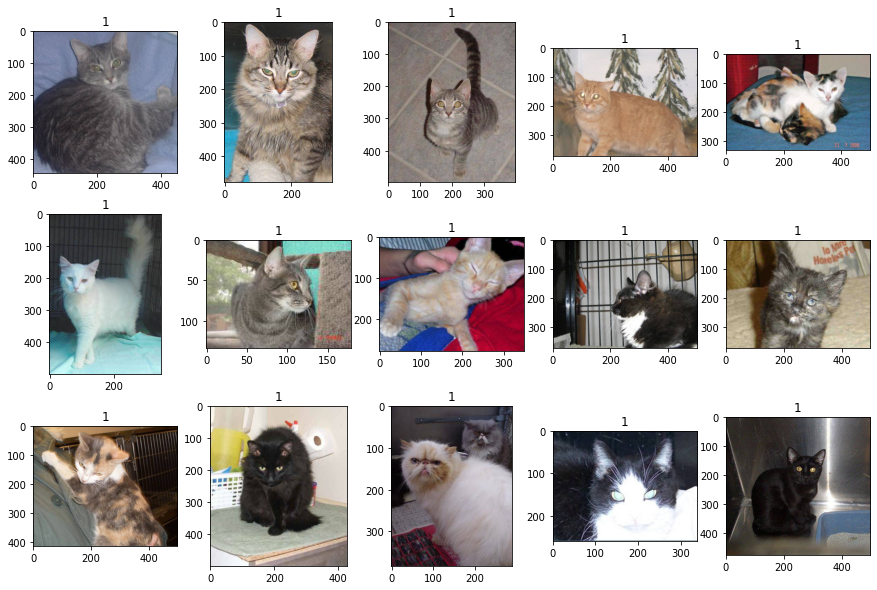


 for cats:



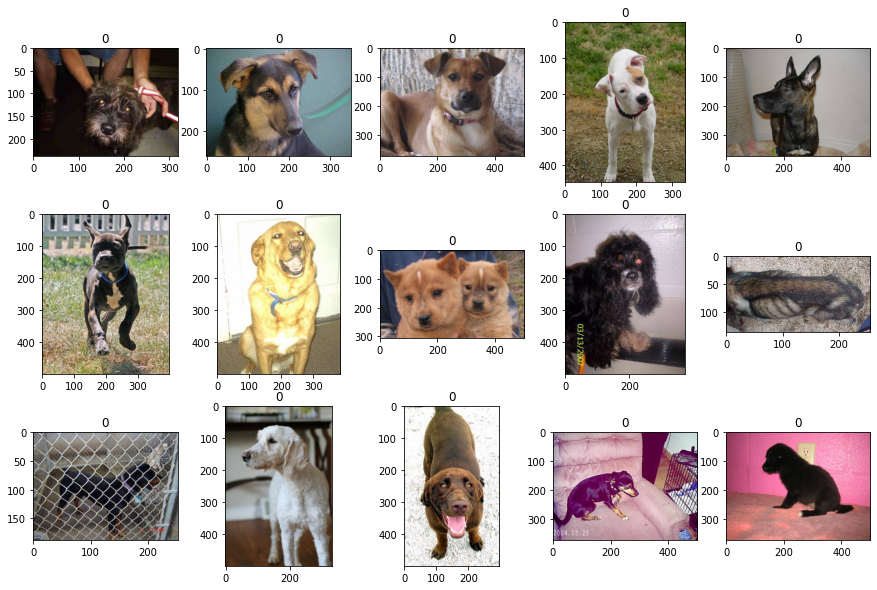

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
print('for dogs:\n')
for i, ax in enumerate(axes.flat):
    ### Image show 
    ### plt imread reads images from dataframe image path
    ax.imshow(plt.imread(df_train.image[i]))
    ### set title of data frame label
    ax.set_title(df_train.label[i])
plt.show()

fig, axes2 = plt.subplots(nrows=3, ncols=5, figsize=(15,10))
print('\n for cats:\n')
for i, ax in enumerate(axes2.flat):
    ax.imshow(plt.imread(df_train.image[i+4005]))

    ax.set_title(df_train.label[i+4005])
plt.show()

Lables Count in Dataframe:

In [15]:
#count of lables in dataframe
print('training set:')
print(df_train.label.value_counts())

print('test set:')
df_test.label.value_counts()

training set:
0    4005
1    4000
Name: label, dtype: int64
test set:


0    1012
1    1011
Name: label, dtype: int64

Split data in training and validation:

In [16]:
df_train,df_val=train_test_split(df_train,test_size=0.2,random_state=42)
print('shape of training:',df_train.shape)
print('shape of validation:',df_val.shape)
print('shape of testing:',df_test.shape)

shape of training: (6404, 2)
shape of validation: (1601, 2)
shape of testing: (2023, 2)


Image Generator:

In [17]:
image_data_generator = ImageDataGenerator(
      rescale = 1./255,#[0,1]
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'#padding
      )

In [18]:
df_train.head()

,image,label
1115,/content/training_set/training_set/cats/cat.18...,1
7772,/content/training_set/training_set/dogs/dog.13...,0
6742,/content/training_set/training_set/dogs/dog.81...,0
1467,/content/training_set/training_set/cats/cat.15...,1
2926,/content/training_set/training_set/cats/cat.28...,1


In [19]:
train=image_data_generator.flow_from_dataframe(dataframe=df_train,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)
test=image_data_generator.flow_from_dataframe(dataframe=df_test,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)
val=image_data_generator.flow_from_dataframe(dataframe=df_val,x_col='image',y_col='label',class_mode='binary',target_size=(200,200),color_mode='rgb',shuffle=False)


Found 6404 validated image filenames belonging to 2 classes.
Found 2023 validated image filenames belonging to 2 classes.
Found 1601 validated image filenames belonging to 2 classes.


In [20]:
input_shape = (200, 200, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 99, 99, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 23, 23, 32)     

In [21]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
201/201 [==============================] - 103s 506ms/step - loss: 0.6939 - accuracy: 0.5105 - val_loss: 0.6954 - val_accuracy: 0.4878
Epoch 2/20
201/201 [==============================] - 102s 508ms/step - loss: 0.6912 - accuracy: 0.5295 - val_loss: 0.6972 - val_accuracy: 0.4878
Epoch 3/20
201/201 [==============================] - 102s 506ms/step - loss: 0.6831 - accuracy: 0.5664 - val_loss: 0.6772 - val_accuracy: 0.5803
Epoch 4/20
201/201 [==============================] - 102s 507ms/step - loss: 0.6820 - accuracy: 0.5629 - val_loss: 0.6853 - val_accuracy: 0.5578
Epoch 5/20
201/201 [==============================] - 101s 502ms/step - loss: 0.6772 - accuracy: 0.5814 - val_loss: 0.6846 - val_accuracy: 0.5434
Epoch 6/20
201/201 [==============================] - 102s 508ms/step - loss: 0.6713 - accuracy: 0.5892 - val_loss: 0.6524 - val_accuracy: 0.6115
Epoch 7/20
201/201 [==============================] - 102s 508ms/step - loss: 0.6607 - accuracy: 0.6140 - val_loss: 0.6604 -

KeyboardInterrupt: ignored

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 48, 48, 64)       

In [ ]:
model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model2.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
201/201 [==============================] - 106s 526ms/step - loss: 1.2801 - accuracy: 0.5133 - val_loss: 0.6940 - val_accuracy: 0.4891
Epoch 2/20
201/201 [==============================] - 105s 524ms/step - loss: 0.6925 - accuracy: 0.5169 - val_loss: 0.6903 - val_accuracy: 0.5434
Epoch 3/20
201/201 [==============================] - 106s 528ms/step - loss: 0.6917 - accuracy: 0.5270 - val_loss: 0.6895 - val_accuracy: 0.5122
Epoch 4/20
201/201 [==============================] - 105s 522ms/step - loss: 0.6776 - accuracy: 0.5529 - val_loss: 0.6952 - val_accuracy: 0.4897
Epoch 5/20
201/201 [==============================] - 105s 521ms/step - loss: 0.6805 - accuracy: 0.5689 - val_loss: 0.6449 - val_accuracy: 0.6371
Epoch 6/20
201/201 [==============================] - 105s 521ms/step - loss: 0.6663 - accuracy: 0.5967 - val_loss: 0.6891 - val_accuracy: 0.5147
Epoch 7/20
201/201 [==============================] - 104s 517ms/step - loss: 0.6630 - accuracy: 0.5995 - val_loss: 0.6593 -

Model with 4 hidden layers of 512,128,128,256:

In [22]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [24]:
model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model3.fit(train, validation_data=val, epochs=20, callbacks=callback)

Epoch 1/20
201/201 [==============================] - 116s 516ms/step - loss: 0.8983 - accuracy: 0.5158 - val_loss: 0.6884 - val_accuracy: 0.5365
Epoch 2/20
201/201 [==============================] - 113s 562ms/step - loss: 0.6949 - accuracy: 0.5214 - val_loss: 0.6920 - val_accuracy: 0.5240
Epoch 3/20
201/201 [==============================] - 102s 509ms/step - loss: 0.6912 - accuracy: 0.5450 - val_loss: 0.6821 - val_accuracy: 0.5953
Epoch 4/20
201/201 [==============================] - 101s 502ms/step - loss: 0.6806 - accuracy: 0.5642 - val_loss: 0.6694 - val_accuracy: 0.6046
Epoch 5/20
201/201 [==============================] - 101s 503ms/step - loss: 0.6687 - accuracy: 0.6084 - val_loss: 0.6648 - val_accuracy: 0.5965
Epoch 6/20
201/201 [==============================] - 101s 504ms/step - loss: 0.6569 - accuracy: 0.6134 - val_loss: 0.6376 - val_accuracy: 0.6377
Epoch 7/20
201/201 [==============================] - 101s 502ms/step - loss: 0.6300 - accuracy: 0.6432 - val_loss: 0.7133 -

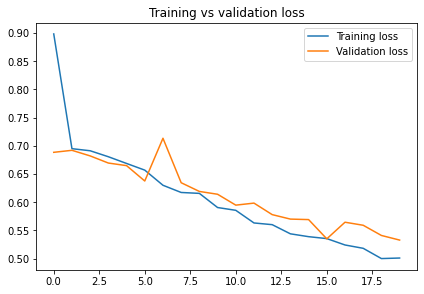

In [25]:
plt.figure(figsize=(15,10))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

Accuracy:

In [26]:
est_accuracy = model3.evaluate(test)[1]

64/64 [==============================] - 25s 385ms/step - loss: 0.5254 - accuracy: 0.7499


save model:

In [27]:
model3.save('model3-1.h5')
#model = keras.models.load_model('model3-1.h5')

In [47]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	model = load_model('model3-1.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[1.2026232e-38]


In [40]:
labels = train.class_indices
labels

{'0': 0, '1': 1}

In [29]:
pred=model3.predict(test)


In [33]:
pred

array([[0.25316575],
       [0.48647192],
       [0.45049006],
       ...,
       [0.8745786 ],
       [0.6320955 ],
       [0.32619724]], dtype=float32)

In [43]:
import numpy as np
pred = np.argmax(pred, axis=0)
y_pred = y_pred[k] for k in pred]

SyntaxError: ignored

In [48]:
from sklearn.metrics import confusion_matrix,f1_score

print('F1 score:', f1_score(df_test.label, pred))
print('\n confussion matrix:\n',confusion_matrix(test.label, pred))

TypeError: ignored

Model with 2 hidden layers of 128

In [26]:
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 99, 99, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 48, 48, 64)       

In [27]:
model5.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history5 = model5.fit(train, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
201/201 [==============================] - 89s 439ms/step - loss: 1.6789 - accuracy: 0.5172 - val_loss: 0.6929 - val_accuracy: 0.5109
Epoch 2/50
201/201 [==============================] - 87s 432ms/step - loss: 0.6811 - accuracy: 0.5531 - val_loss: 0.6714 - val_accuracy: 0.5690
Epoch 3/50
201/201 [==============================] - 86s 428ms/step - loss: 0.6738 - accuracy: 0.5553 - val_loss: 0.6641 - val_accuracy: 0.6009
Epoch 4/50
201/201 [==============================] - 86s 430ms/step - loss: 0.6577 - accuracy: 0.5842 - val_loss: 0.6987 - val_accuracy: 0.5646
Epoch 5/50
201/201 [==============================] - 86s 428ms/step - loss: 0.6527 - accuracy: 0.5920 - val_loss: 0.6778 - val_accuracy: 0.5646
Epoch 6/50
201/201 [==============================] - 86s 429ms/step - loss: 0.6505 - accuracy: 0.5984 - val_loss: 0.6884 - val_accuracy: 0.5322
Epoch 7/50
201/201 [==============================] - 86s 428ms/step - loss: 0.6821 - accuracy: 0.5615 - val_loss: 0.6773 - val_ac

In [29]:
model5.save('model5-1.h5')
#model = keras.models.load_model('model3-1.h5')

In [30]:
accuracy = history5.history['accuracy']
val_accuracy  = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

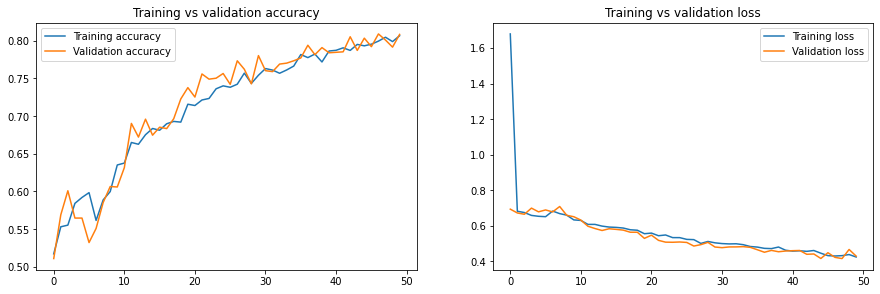

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()